In [1]:
import utils
import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns
from ripser import Rips

/home/archit/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


Gudhi not found--GraphInducedComplex not available


In [2]:
# Script constants
TEST_FRACTION = 0.20
EPOCHS        = 20

# Read data
data = utils.read_and_build_features()
# data = utils.read_and_build_features()[:50]  # smaller data for testing purposes

# Split into train-test
dataset = utils.split_train_test(data, TEST_FRACTION)

In [3]:
point = dataset.X_train[0]

In [4]:
def seriation(Z,N,cur_index):
    '''
        input:
            - Z is a hierarchical tree (dendrogram)
            - N is the number of points given to the clustering process
            - cur_index is the position in the tree for the recursive traversal
        output:
            - order implied by the hierarchical tree Z
            
        seriation computes the order implied by a hierarchical tree (dendrogram)
    '''
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index-N,0])
        right = int(Z[cur_index-N,1])
        return (seriation(Z,N,left) + seriation(Z,N,right))
    
def compute_serial_matrix(dist_mat,method="ward"):
    '''
        input:
            - dist_mat is a distance matrix
            - method = ["ward","single","average","complete"]
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    '''
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    res_linkage = linkage(flat_dist_mat, method=method,preserve_input=True)
    res_order = seriation(res_linkage, N, N + N-2)
    seriated_dist = np.zeros((N,N))
    a,b = np.triu_indices(N,k=1)
    seriated_dist[a,b] = dist_mat[ [res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b]
    
    return seriated_dist, res_order, res_linkage

In [5]:
mat = np.sqrt(1 - point.correlation_matrix)

In [6]:
pd = point.persistence_diagram

In [7]:
rips = Rips()

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


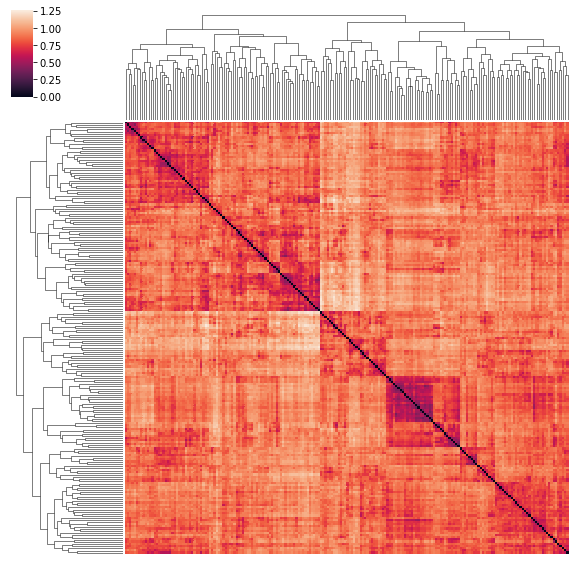

In [8]:
# fig, ax = plt.subplots(figsize=(8, 8))

g = sns.clustermap(mat)
ax = g.ax_heatmap
ax.set_xticks([])
ax.set_yticks([])
ax.set_axis_off()

Text(0, 0.5, '')

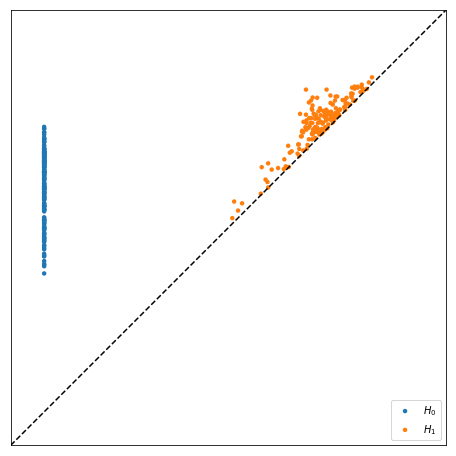

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xticks([])
ax.set_yticks([])
rips.plot(pd, show=False)
ax.set_xlabel('')
ax.set_ylabel('')

In [13]:
landscape = point.persistence_landscape.reshape(5, 200)

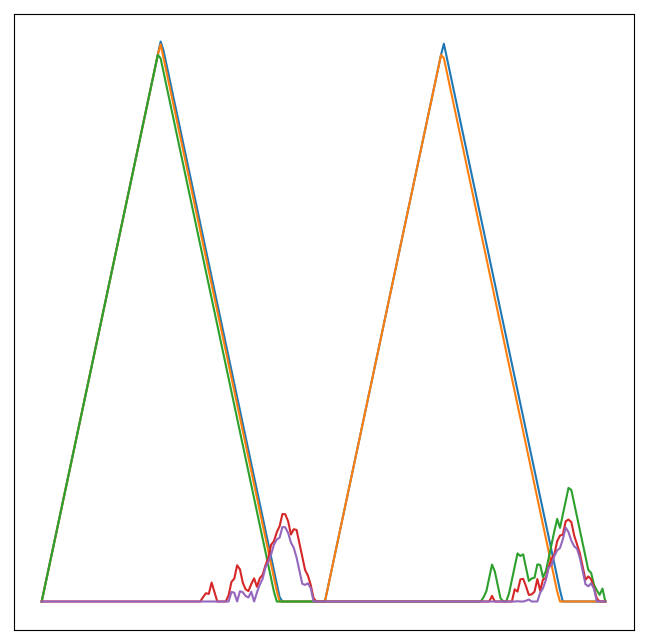

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xticks([])
ax.set_yticks([])
for l in landscape:
    plt.plot(l)

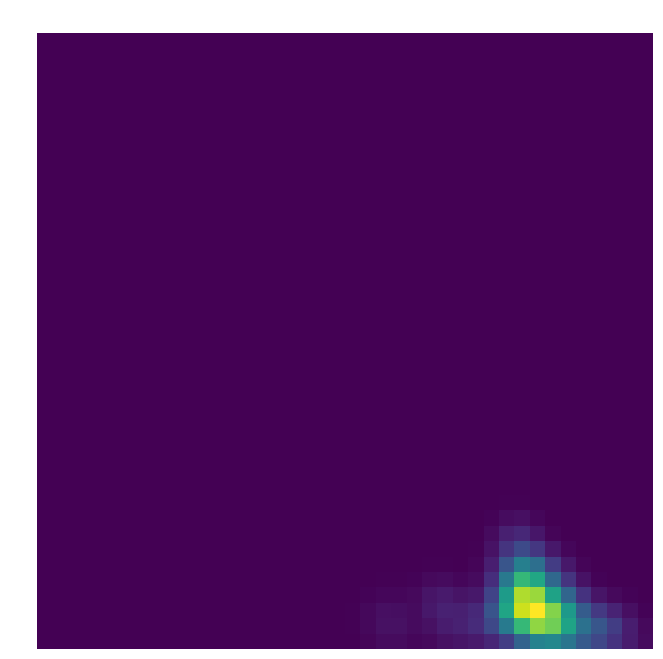

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xticks([])
ax.set_yticks([])
ax.set_axis_off()
ax.matshow(point.persistence_image_list[1].reshape(40, 40))